In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info: str

In [33]:
def start_play(state: State):
    print("Starting node  play...")
    return{'graph_info' : state['graph_info']+ "i am planning to play "}

def circket(state:State):
    print("Starting circket play...")
    return {'graph_info': state['graph_info'] + "circket"}

def badminton(state:State):
    print("Starting badminton play...")
    return {'graph_info': state['graph_info'] + "badminton"}

def football(state:State):
    print("Starting football play...")
    return {'graph_info': state['graph_info'] + "football"}

In [34]:
import random
from typing import Literal

# Assuming State is a dict-like object
def random_play(state: dict) -> Literal['circket', 'badminton', 'football']:
    graph_info = state['graph_info']  # Currently unused

    rand_val = random.random()
    
    if rand_val > 0.5:
        return "circket"
    elif rand_val == 0.5:
        return "football"
    else:
        return "badminton"


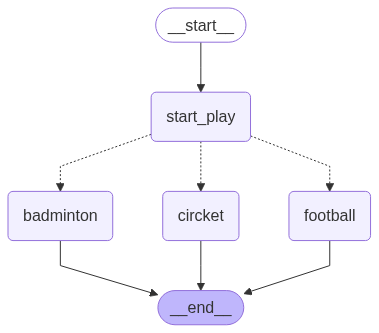

In [35]:
from IPython.display import display,Image
from langgraph.graph import StateGraph,START, END

graph = StateGraph(State)

graph.add_node('start_play', start_play)
graph.add_node('circket', circket)
graph.add_node('badminton', badminton)
graph.add_node('football', football)

graph.add_edge(START, 'start_play')
graph.add_conditional_edges('start_play',random_play)
graph.add_edge('circket', END)  # Fixed node name
graph.add_edge('badminton', END)
graph.add_edge('football', END)

graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [41]:
graph_builder.invoke({'graph_info': 'Hi , My name is vibhav '})

Starting node  play...
Starting circket play...


{'graph_info': 'Hi , My name is vibhav i am planning to play circket'}